# Exploring Your Data - Lab

## Introduction 

In this lab you'll perform a exploratory data analysis task, using statistical and visual EDA skills. You'll continue using the Lego dataset that you've acquired and cleaned in the previous labs. 

## Objectives
You will be able to:

* Check the distribution of various columns
* Examine the descriptive statistics of our data set
* Create visualizations to help us better understand our data set

## Data Exploration

At this point, you've already done a modest amount of data exploration between investigating the initial database to further exploring individual features while cleaning things up in preparation for modeling. During this process, you've become more familiar with the particular idiosyncrasies of the dataset. This gives you an opportunity to uncover difficulties and potential pitfalls in working with the dataset as well as potential avenues for feature engineering that could improve the predictive performance of your model down the line. Remember that this is also not a linear process; after building an initial model, you might go back and continue to mine the dataset for potential inroads to create additional features and improve the model's performance if initial results did not satisfy your needs and expectations. Here, you'll continue this process, investigating the distributions of some of the various features and their relationship to the target variable: `list_price`.

### Load the dataset 'Lego_dataset_cleaned.csv'  and Check its Contents 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')

In [2]:
df = pd.read_csv('Lego_data_cleaned.csv')

In [3]:
display(df.head())

,prod_id,ages,piece_count,set_name,prod_desc,prod_long_desc,theme_name,country,list_price,num_reviews,play_star_rating,review_difficulty,star_rating,val_star_rating
0,75823,6-12,277,Bird Island Egg Heist,Catapult into action and take back the eggs fr...,Use the staircase catapult to launch Red into ...,Angry Birds™,US,29.99,-0.444421,-0.621818,Average,-0.021430,-0.345554
1,75822,6-12,168,Piggy Plane Attack,Launch a flying attack and rescue the eggs fro...,Pilot Pig has taken off from Bird Island with ...,Angry Birds™,US,19.99,-0.444421,-0.621818,Easy,1.016996,-0.345554
2,75821,6-12,74,Piggy Car Escape,Chase the piggy with lightning-fast Chuck and ...,Pitch speedy bird Chuck against the Piggy Car....,Angry Birds™,US,12.99,-0.191490,-0.096948,Easy,-0.436801,-0.184411
3,21030,12+,1032,United States Capitol Building,Explore the architecture of the United States ...,Discover the architectural secrets of the icon...,Architecture,US,99.99,0.145752,-1.321644,Average,0.186255,0.137875
4,21035,12+,744,Solomon R. Guggenheim Museum®,Recreate the Solomon R. Guggenheim Museum® wit...,Discover the architectural secrets of Frank Ll...,Architecture,US,79.99,-0.107179,-2.021470,Challenging,0.186255,-0.184411


### Describe the dataset using 5 point statistics and record your observations

In [4]:
df.describe()

,prod_id,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating
count,1.087000e+04,10870.000000,10870.000000,1.087000e+04,1.087000e+04,1.087000e+04,1.087000e+04
mean,6.181634e+04,503.936431,67.309137,-8.040180e-17,-9.654753e-16,2.325279e-15,-1.917714e-16
std,1.736390e+05,831.209318,94.669414,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00
min,6.300000e+02,1.000000,2.272400,-4.725247e-01,-5.870515e+00,-5.628930e+00,-5.179844e+00
25%,2.112300e+04,97.000000,21.899000,-4.163177e-01,-4.468610e-01,-4.368005e-01,-3.455540e-01
50%,4.207350e+04,223.000000,36.587800,-3.039038e-01,7.800875e-02,1.862551e-01,0.000000e+00
75%,7.124800e+04,556.000000,73.187800,-9.984366e-17,6.028785e-01,8.093107e-01,6.213041e-01
max,2.000431e+06,7541.000000,1104.870000,9.813354e+00,1.127748e+00,1.016996e+00,1.265876e+00


### Use pandas histogram plotting to plot histograms for all the variables in the dataset

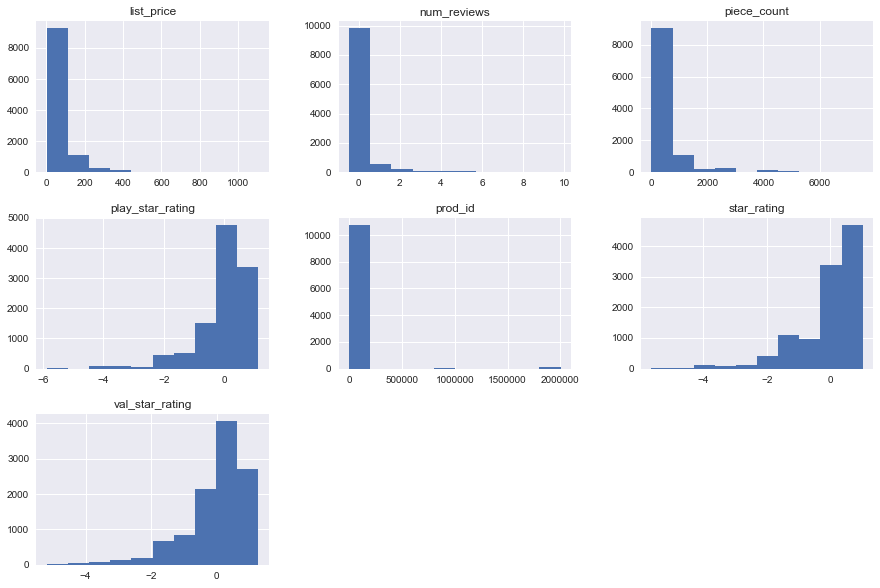

In [5]:
df.hist(figsize=(15,10));

Note how skewed most of these distributions are. While linear regression does not assume that each of the individual predictors are normally distributed, it does assume a linear relationship between the predictors and the target variable (list_price in this case). To further investigate if this assumption holds true, you can plot some single variable regression plots of each feature against the target variable using seaborn.

## Check for Linearity

Recall that one assumption in linear regression is that the target variable is linearly related to the input features. As shown in the previous lesson, you can use the `sns.jointplot()` function to investigate whether this relation holds true for the various predictors on hand.

C:\Users\Matthew Parker\.conda\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


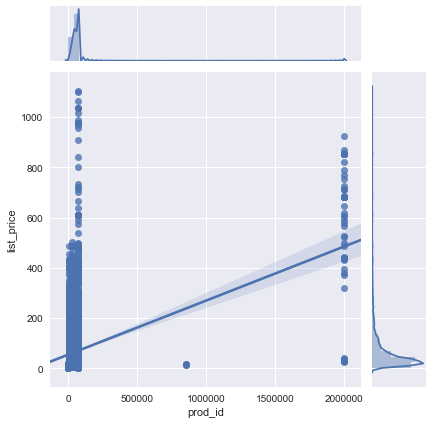

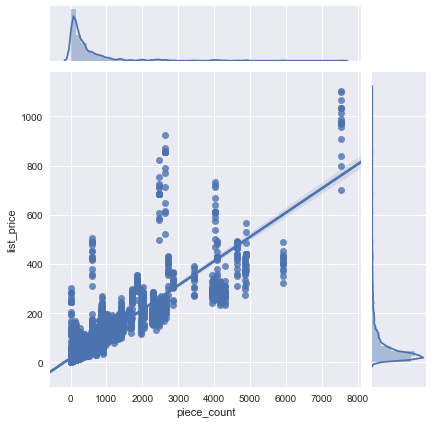

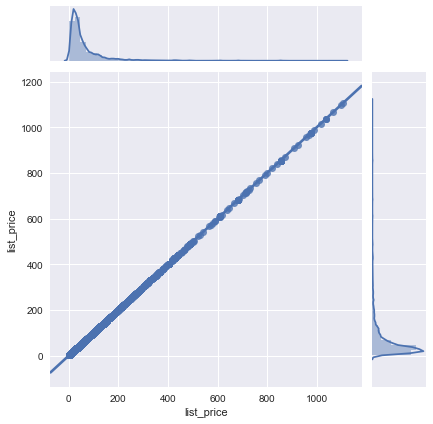

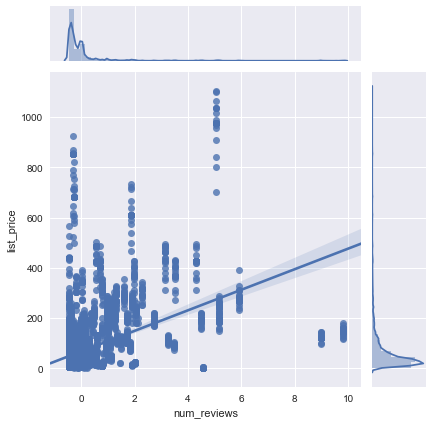

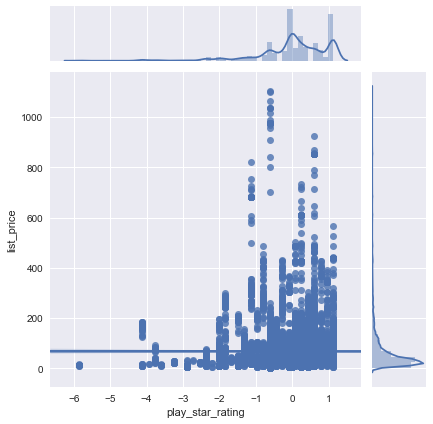

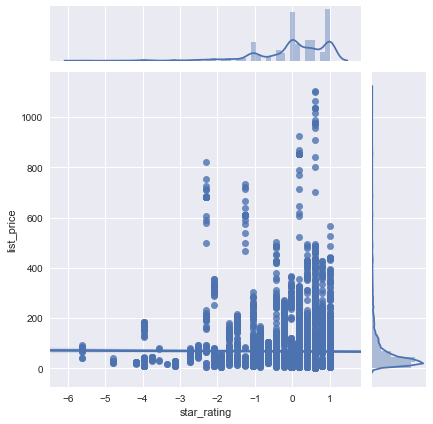

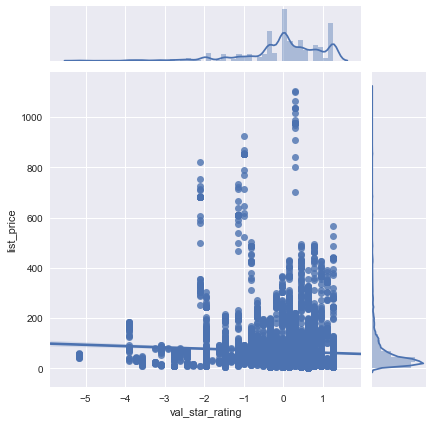

In [6]:
for x in list(df.describe().columns):
    sns.jointplot(x=x, y='list_price', data=df, kind='reg')

## Comments

Well, at first look it appears that the previous efforts in order to fill in the null review values proved of little value. Perhaps this was due to imputing the mean, but as it currently stands, each of the rating features seems to have little to no predictive power for the upcoming model.

## Checking for Multicollinearity

It's also important to make note of whether your predictive features will result in multicollinearity in the resulting model. While definitive checks for multicollinearity require analyzing the resulting model, predictors with overly high pairwise-correlation (r^2 > .65) are almost certain to produce multicollinearity in a model. With that, take a minute to generate the pairwise [pearson] correlation coefficients of your predictive features and visualizes these coefficients as a heatmap.

In [7]:
features = ['piece_count', 'num_reviews', 'play_star_rating','star_rating','val_star_rating']

# Compute the correlation matrix
corr = df[features].corr()
corr

,piece_count,num_reviews,play_star_rating,star_rating,val_star_rating
piece_count,1.000000,0.532861,-0.007804,0.066445,0.066019
num_reviews,0.532861,1.000000,-0.060805,0.004541,0.026623
play_star_rating,-0.007804,-0.060805,1.000000,0.615387,0.483772
star_rating,0.066445,0.004541,0.615387,1.000000,0.726264
val_star_rating,0.066019,0.026623,0.483772,0.726264,1.000000


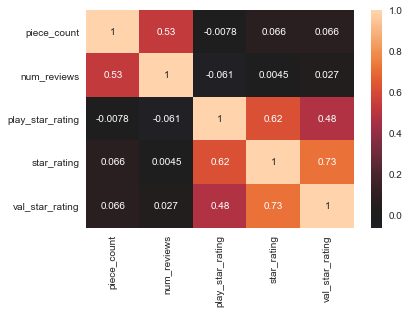

In [8]:
sns.heatmap(corr, center=0, annot=True);

> Comments: The rating features show little promise for adding predictive power towards the list_price. This diminishes worry concerning their high correlation. That said, the two most promising predictors: piece_count and num_reviews also display fairly high correlation. Further analysis of an initial model will clearly be warranted.

## Further Resources

Have a look at following resources on how to deal with complex datasets that don't meet our initial expectations. 

[What to Do When Bad Data Thwarts Machine Learning Success](https://towardsdatascience.com/what-to-do-when-bad-data-thwarts-machine-learning-success-fb82249aae8b)

[Practical advice for analysis of large, complex data sets ](http://www.unofficialgoogledatascience.com/2016/10/practical-advice-for-analysis-of-large.html)

[Data Cleaning Challenge: Scale and Normalize Data](https://www.kaggle.com/rtatman/data-cleaning-challenge-scale-and-normalize-data)

## Summary 

In this lesson you performed some initial EDA onto check for regression assumptions. In the upcoming lessons, you'll continue to carry out a standard data science process and begin to fit and refine an initial model.